# **Subject: Data Mining** #

Name: Nguyễn Hoàng Trung Kiên

Student's ID: 22127478

Last modified: 06/12/2024

# Lab 02: Classification

### Self evaluation:

| Tasks | Completeness |
|----------|----------|
| Classification algorithms implementation | 100%  |
| Evaluation | 100%  |
| Comparison and Analysis  | 100%  |

### Import dataset:

In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Ping\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

### Import libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

- Combine data features with target

In [4]:
df = [X, y]
data = pd.concat(df, axis=1)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## 1. Preprocessing:

This section will be shorten because the processing task has been done steps by steps from ```Lab 01 - Preprocessing```, while in this lab we mainly focus on ```Classification```, so instead of implementing the algorithm to prove and explain which method should be done, I will directly handle the ```Preprocessing``` task, by reducing the steps and seeking for the help of external libraries.

### 1.1. Data cleaning:

#### Check missing data ####

- Check missing data by percentage

In [5]:
def check_missing_data(data):
    missing_data = {}
    
    for col in data:
        empty_val = 0
        for value in data[col]:
            if value == "?" or value != value:  
                empty_val += 1
        missing_data[col] = empty_val / len(data[col]) * 100
    return missing_data    

missing_data = check_missing_data(data)
for k, v in missing_data.items():
    print(f'{k}: {v} %')

age: 0.0 %
workclass: 5.7307235575938735 %
fnlwgt: 0.0 %
education: 0.0 %
education-num: 0.0 %
marital-status: 0.0 %
occupation: 5.751197739650301 %
relationship: 0.0 %
race: 0.0 %
sex: 0.0 %
capital-gain: 0.0 %
capital-loss: 0.0 %
hours-per-week: 0.0 %
native-country: 1.7546374022357807 %
income: 0.0 %


#### Fill in missing data ####

- Fill in the missing data with ```mode```

In [6]:
def fill_in_mode(data):
    for column in data:
        values, counts = np.unique([val for val in data[column] if val == val], return_counts=True)
        mode_value = values[np.argmax(counts)]
        
        data[column] = np.where((data[column] == "?") | (data[column].isna()), mode_value, data[column])

fill_in_mode(data)

#### Handle duplicates ####

In [7]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)

#### Handle wrong format data ####

- In the ```income``` column, some rows have the "**.**" after the main value. So they will be removed.

In [8]:
unique_values = list(set(data['income']))  
print(f"Distinct values in '{'income'}': {unique_values}")

Distinct values in 'income': ['<=50K', '>50K', '<=50K.', '>50K.']


In [9]:
data = data.copy()
data['income'] = [x[:-1] if x[-1] == '.' else x for x in data['income']]

### 1.2. Features selection ###

#### 1.2.1. Nominal data

- Implement **Cramer's V** to choose important nominal columns 

In [10]:
def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  
    r, k = contingency_table.shape
    phi = chi2 / n
    return np.sqrt(phi / min(k - 1, r - 1))

def calculate_cramers_v_matrix(data, features):
    n = len(features)
    cramers_v_matrix = np.zeros((n, n))
    
    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            if i == j:
                cramers_v_matrix[i, j] = 1 
            elif i < j:
                contingency_table = pd.crosstab(data[feature1], data[feature2])
                cramers_v_value = cramers_v(contingency_table)
                if isinstance(cramers_v_value, (int, float)): 
                    cramers_v_matrix[i, j] = cramers_v_value
                    cramers_v_matrix[j, i] = cramers_v_value 
                else:
                    print(f"Unexpected value for Cramer's V: {cramers_v_value}")
                
    return cramers_v_matrix

- Correlation matrix of nominal data

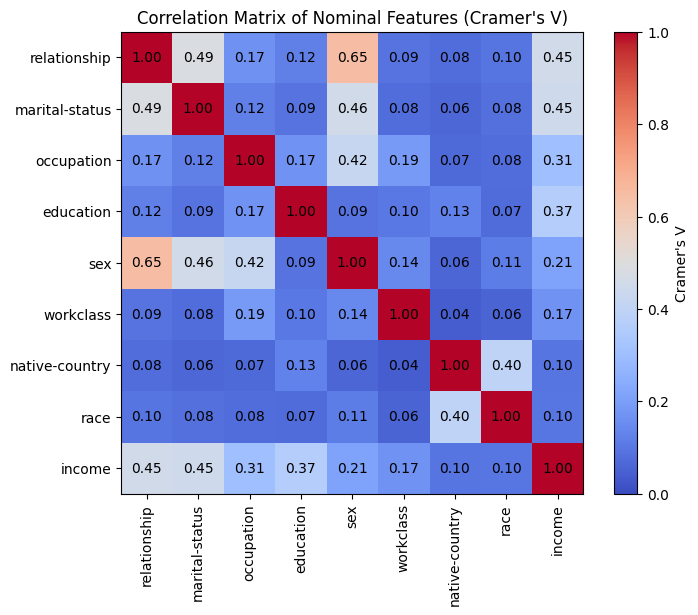

In [11]:
feature_names = ['relationship', 'marital-status', 'occupation', 'education', 'sex', 'workclass', 'native-country', 'race', 'income']

cramers_v_matrix = calculate_cramers_v_matrix(data, feature_names)

plt.figure(figsize=(8, 6))
plt.imshow(cramers_v_matrix, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar(label="Cramer's V")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.yticks(range(len(feature_names)), feature_names)

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        plt.text(j, i, f"{cramers_v_matrix[i, j]:.2f}", ha="center", va="center", color="black")

plt.title("Correlation Matrix of Nominal Features (Cramer's V)")
plt.show()

- ```sex``` and ```relationship``` have strong correlation. So ```sex``` column will be removed.

In [12]:
del data['sex']
feature_names.remove('sex')

- The columns that have high correlation with target column ```income``` will also be removed.

In [13]:
del data['workclass']
del data['native-country']
del data['race']

- Remove ```education``` since we have ```education-num```

In [14]:
del data['education']

#### 1.2.2. Numeric data

- Encode ```income``` column into **1** and **0**, then calculate correlation

In [15]:
num_df = data[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']].copy()
num_df['income'] = np.where(data['income'] == '>50K', 1, 0)
correlation_matrix = num_df.corr()

- Correlation matrix of nominal data

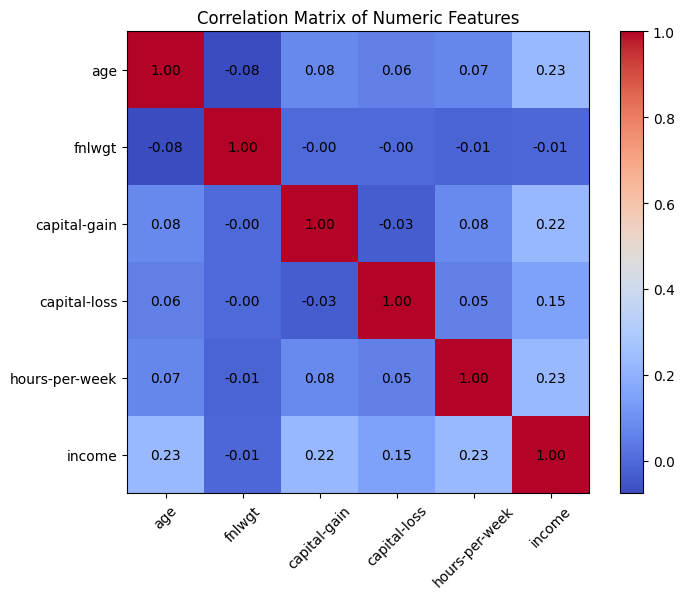

In [16]:
plt.figure(figsize=(8, 6))
cax = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(cax)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

- The columns that have high correlation with target column ```income``` will be removed.

In [17]:
del data['fnlwgt']
del data['capital-loss']

### 1.3. Encode nominal data

- Encode data using ```OneHotEncoder```

In [18]:
nominal_cols = ['marital-status', 'occupation', 'relationship']
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded = encoder.fit_transform(data[nominal_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(nominal_cols))
data = pd.concat([data.drop(columns=nominal_cols), encoded_df], axis=1)
data['income'] = data['income'].map({'>50K': 1.0, '<=50K': 0.0})

### 1.4. Data normalization ###

- Normalize data into range ```[0, 1]``` using **MinMaxScaler**

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['capital-gain'] = scaler.fit_transform(data[['capital-gain']])
data['age'] = scaler.fit_transform(data[['age']])
data['education-num'] = scaler.fit_transform(data[['education-num']])
data['hours-per-week'] = scaler.fit_transform(data[['hours-per-week']])

- Data after preprocessing

In [20]:
data

,age,education-num,capital-gain,hours-per-week,income,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.301370,0.800000,0.021740,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.452055,0.800000,0.000000,0.122449,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.287671,0.533333,0.000000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.493151,0.400000,0.000000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.150685,0.800000,0.000000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48808,0.301370,0.800000,0.000000,0.357143,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48809,0.643836,0.533333,0.000000,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48810,0.287671,0.800000,0.000000,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48811,0.369863,0.800000,0.054551,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 1.5. Split data into train and test set

- Split dataset into 2 subsets: training set (70%) and a test set (30%)

In [21]:
X = data.loc[:, data.columns != 'income']  
y = data.loc[:, 'income'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

## 2.  Classification algorithms implementation

For classification and parameters tuning, I'll use ```GridSearchCV``` to find the best parameters combination, so that I can decide which model has the best performance on the dataset based on the tested parameters.

**Create some lists to store the results for later measurement:**

- ```y_preds```: stores prediction made by each model
- ```y_probs```: stores probability score of each model, to calculate AUC
- ```run_time```: stores runtime of training and predicting model
- ```best_models```: stores the models with the best combination of parameters

In [22]:
y_preds = []
y_probs = []
run_time = []
best_models = []

### 2.1. Decision tree ###

- Implement ```Decision Tree``` with parameters tuning for ```criterion``` (gini, entropy) and ```max_depth``` (5, 10, 30)

In [23]:
decision_tree = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [5, 10, 30]      
}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_models.append(best_model)

print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10}


- Train and predict the best model, measure the runtime of the process.

In [24]:
start_time = time.time()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
end_time = time.time()

- Store ```runtime```, ```y_pred (prediction)``` and ```y_probs (probability)``` for later calculation

In [25]:
run_time.append(end_time - start_time)
y_preds.append(y_pred)
y_probs.append(best_model.predict_proba(X_test)[:, 1])

### 2.2. Random Forest ###

- Implement ```Random Forest``` with parameters tuning for ```n_estimators``` (5, 10) ,```max_features``` (sqrt, log2) and ```bootstrap``` (True, False)

In [26]:
random_forest = RandomForestClassifier()
param_grid = {
    'n_estimators': [5, 10],  
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
                
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_models.append(best_model)

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 10}


- Train and predict the best model, measure the runtime of the process.

In [27]:
start_time = time.time()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
end_time = time.time()

- Store ```runtime```, ```y_pred (prediction)``` and ```y_probs (probability)``` for later calculation

In [28]:
run_time.append(end_time - start_time)
y_preds.append(y_pred)
y_probs.append(best_model.predict_proba(X_test)[:, 1])

### 2.3. Gaussian Naive Bayes ###

- Implement ```Gaussian Naive Bayes``` with parameters tuning for ```var_smoothing``` (1e-9, 0.1, 1, 10, 20)

In [29]:
gnb = GaussianNB()
param_grid = {
    'var_smoothing' : [1e-9, 0.1, 1, 10, 20]
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_models.append(best_model)

print("Best Parameters:", best_params)

Best Parameters: {'var_smoothing': 1e-09}


- Train and predict the best model, measure the runtime of the process.

In [30]:
start_time = time.time()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
end_time = time.time()

- Store ```runtime```, ```y_pred (prediction)``` and ```y_probs (probability)``` for later calculation

In [31]:
run_time.append(end_time - start_time)
y_preds.append(y_pred)
y_probs.append(best_model.predict_proba(X_test)[:, 1])

### 2.4. Support Vector Machine (SVM) ###

- Implement ```Support Vector Machine``` with parameters tuning for ```kernel``` (linear, poly) and ```gamma``` (scale, auto)

In [32]:
svm = SVC()
param_grids = {
    'kernel': ['linear', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grids, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_models.append(best_model)

print("Best Parameters:", best_params)

Best Parameters: {'gamma': 'scale', 'kernel': 'linear'}


- Train and predict the best model, measure the runtime of the process.

In [33]:
start_time = time.time()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
end_time = time.time()

- Store ```runtime```, ```y_pred (prediction)``` and ```y_probs (probability)``` for later calculation

In [34]:
run_time.append(end_time - start_time)
y_preds.append(y_pred)
y_probs.append(best_model.decision_function(X_test))

### 2.5. Neural Network: Multilayer Perceptron (MLP) ###

- Implement ```Neural Network: Multilayer Perceptron``` with parameters tuning for ```hidden_layer_sizes``` ((50, ), (100, )), ```activation``` (identity, relu) and ```learning_rate``` (constant, invscaling, adaptive)

In [35]:
mlp = MLPClassifier(max_iter=1000)
param_grids = {
    'hidden_layer_sizes' : [(50, ), (100, )],
    'activation' : ['identity', 'relu'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grids, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_models.append(best_model)

print("Best Parameters:", best_params)

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}


- Train and predict the best model, measure the runtime of the process.

In [36]:
start_time = time.time()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
end_time = time.time()

- Store ```runtime```, ```y_pred (prediction)``` and ```y_probs (probability)``` for later calculation

In [37]:
run_time.append(end_time - start_time)
y_preds.append(y_pred)
y_probs.append(best_model.predict_proba(X_test)[:, 1])

### Document the parameters tested and best combination found

**1. Decision Tree:**
- ```criterion``` : gini, entropy
- ```max_depth``` : 5, 10, 30

$\rightarrow$ Best combination : ```criterion``` : entropy, ```max_depth```: 10

**2. Random Forest:**
- ```n_estimators``` : 5, 10
- ```max_features``` : log2, sqrt
- ```bootstrap``` : True, False

$\rightarrow$ Best combination: ```n_estimators``` : 10, ```max_features``` : sqrt, ```bootstrap``` : True (in some run cases ```max_features``` is log2)

**3. Guassian Naive Bayes:**
- ```var_smoothing``` : 1e-9, 0.1, 1, 10, 20

$\rightarrow$ Best combination: ```var_smoothing``` : 1e-9

**4. Support Vector Machine (SVM):**
- ```kernel``` : linear, poly
- ```gamma``` : scale, auto

$\rightarrow$ Best combination: ```kernel``` : linear, ```gamma``` : scale

**5. Neural Network: Multilayer Perceptron:**
- ```hidden_layer_sizes``` : (50, ), (100, )
- ```activation``` : identity, relu
- ```learning_rate``` : constant, invscaling, adaptive

$\rightarrow$ Best combination: ```hidden_layer_sizes``` : (50,), ```activation``` : relu, ```learning_rate``` : constant (in some cases ```learning_rate``` is invscaling or adaptive)

## 3. Evaluation

This section will dive into evaluating each of the best model by analyzing these metrics:

**Performance Overview:**

- Confusion matrix
- Accuracy

**Metrics for Positive and Negative Classes:**

- Precision
- Recall
- Specificity
- F1 Score

**Model Discrimination Ability:**

- ROC Curve and AUC Score

The result will be displayed for each best model below, calculated by lists of ```y_preds``` and ```y_probs``` earlier.

1. Decision Tree:
Accuracy: 0.8535
Precision: 0.7521
Recall: 0.5790
Specificity: 0.9399
F1 Score: 0.6543


<Figure size 800x600 with 0 Axes>

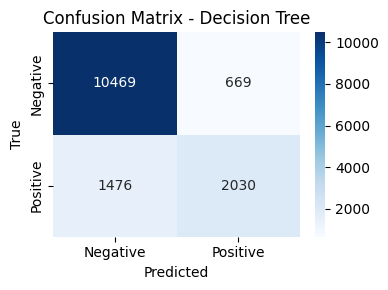

2. Random Forest:
Accuracy: 0.8355
Precision: 0.6773
Recall: 0.5975
Specificity: 0.9104
F1 Score: 0.6349


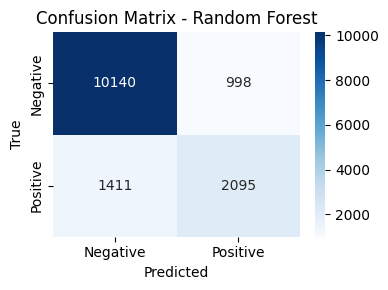

3. Gaussian Naive Bayes:
Accuracy: 0.7693
Precision: 0.5112
Recall: 0.8349
Specificity: 0.7487
F1 Score: 0.6341


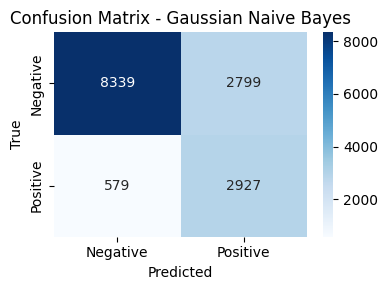

4. Support Vector Machine:
Accuracy: 0.8497
Precision: 0.7298
Recall: 0.5910
Specificity: 0.9311
F1 Score: 0.6531


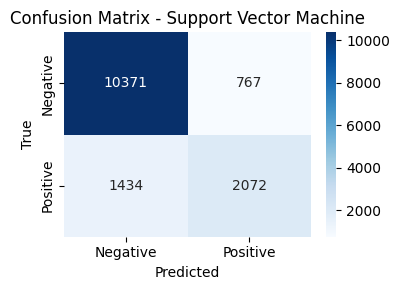

5. Neural Network: Multilayer Perceptron:
Accuracy: 0.8539
Precision: 0.7288
Recall: 0.6209
Specificity: 0.9273
F1 Score: 0.6706


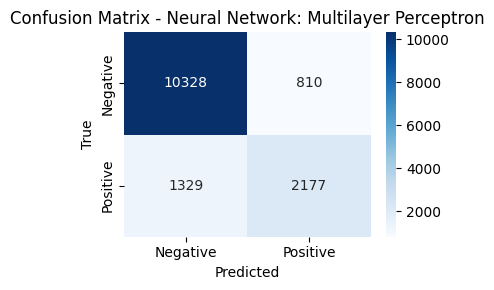

In [38]:
model_names = ['Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'Support Vector Machine', 'Neural Network: Multilayer Perceptron']
model_metrics = []

plt.figure(figsize=(8, 6))

for i in range(5):
    cm = confusion_matrix(y_test, y_preds[i])
    accuracy = accuracy_score(y_test, y_preds[i])
    precision = precision_score(y_test, y_preds[i])
    recall = recall_score(y_test, y_preds[i])
    f1 = f1_score(y_test, y_preds[i])
    
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    print(f"{i + 1}. {model_names[i]}:")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'F1 Score: {f1:.4f}')

    fpr, tpr, thresholds = roc_curve(y_test, y_probs[i])
    auc_score = auc(fpr, tpr)
    model_metrics.append({
        "model": model_names[i],
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
        "f1_score": f1,
        "auc_score": auc_score,
        "cm": cm
    })
    
    fig, ax = plt.subplots(figsize=(4, 3))  
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix - {model_names[i]}')
    plt.tight_layout()
    plt.show()


- ROC curves for all models following the Area Under the Curve (AUC)

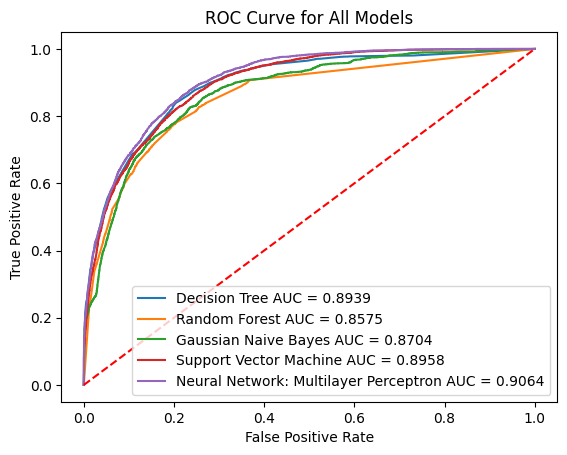

In [39]:
for i in range(5):
    fpr, tpr, thresholds = roc_curve(y_test, y_probs[i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} AUC = {auc_score:.4f}')

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()

###  Analyze the trade-offs between different classification algorithms

#### 1. Summarize results

| Metrics | Highest | Lowest |
|---------|---------|--------|
| Accuracy | Decision Tree | Guassian Naive Bayes |
| Precision | Decision Tree | Guassian Naive Bayes |
| Recall | Guassian Naive Bayes | Decision Tree |
| Specificity | Decision Tree | Guassian Naive Bayes |
| F1-Score | Neural Network: Multilayer Perceptron | Guassian Naive Bayes |
| AUC Score | Neural Network: Multilayer Perceptron | Random Forest | 

#### 2. Comments on results

- ```Decision Tree``` has highest **accuracy**, **precision** and **specificity** due to many reasons. For **accuracy**, I tested that classification algorithm with ```max_depths``` 5, 10, 20, which indicates that it chooses the moderate depth in order to avoid Underfitting or Overfitting. And it also can adapt the data without assuming its distribution (This dataset is not normally distributed and has large quantity of records, which has been proven when I did the Preprocessing Lab Assignment). For **precision**, it focuses on maximizing the purity in the leaves (by gini or entropy), which reducing the number of false positives. And for **specificity**, the algorithm partitions the data effectively, in order to minimize the false negatives.

- ```Random Forest``` has lowest **AUC Score** but not really low, since its output is the average decision trees. When deciding the average result, rather than smoothly, it votes result in probabilities that changes in steps.

- ```Guassian Naive Bayes``` has lowest **accuracy**, **precision**, **specificity** and **F1-Score** but highest **Recall**, mostly due to imbalanced dataset and abnormal distribution. Guassian is recommended when the data has Guassian distribution, and the features should be continuous. But after using ```OneHotEncoding```, some features are in binary type leads to misclassifications. The algorithm tend to predicts a certain class based on its priority than other classes, reducing ability to provide balanced prediction and metrics. Its **recall** is the highest, also because the algorithm only priors to predict the positive class frequently, increasing **recall**.

- ```Neural Network: Multilayer Perceptron``` has highest **F1-Score** and **AUC Score** . It can learn nonlinear relationships in data, distinguishes classes effectively, which leads to high **F1-Score** and **AUC**. 

## 4. Comparison and Analysis

### 4.1. Compare each evaluation metrics of the best models

In this section I will compare each evaluation metrics of the classification algorithms, and point out the best models using those methods.

- Extracting results from section 3

In [40]:
model_names = [metric['model'] for metric in model_metrics]
accuracy = [metric['accuracy'] for metric in model_metrics]
precision = [metric['precision'] for metric in model_metrics]
recall = [metric['recall'] for metric in model_metrics]
specificity = [metric['specificity'] for metric in model_metrics]
f1_score = [metric['f1_score'] for metric in model_metrics]
auc_score = [metric['auc_score'] for metric in model_metrics]

- Plot the comparison of the evaluation metrics by each model

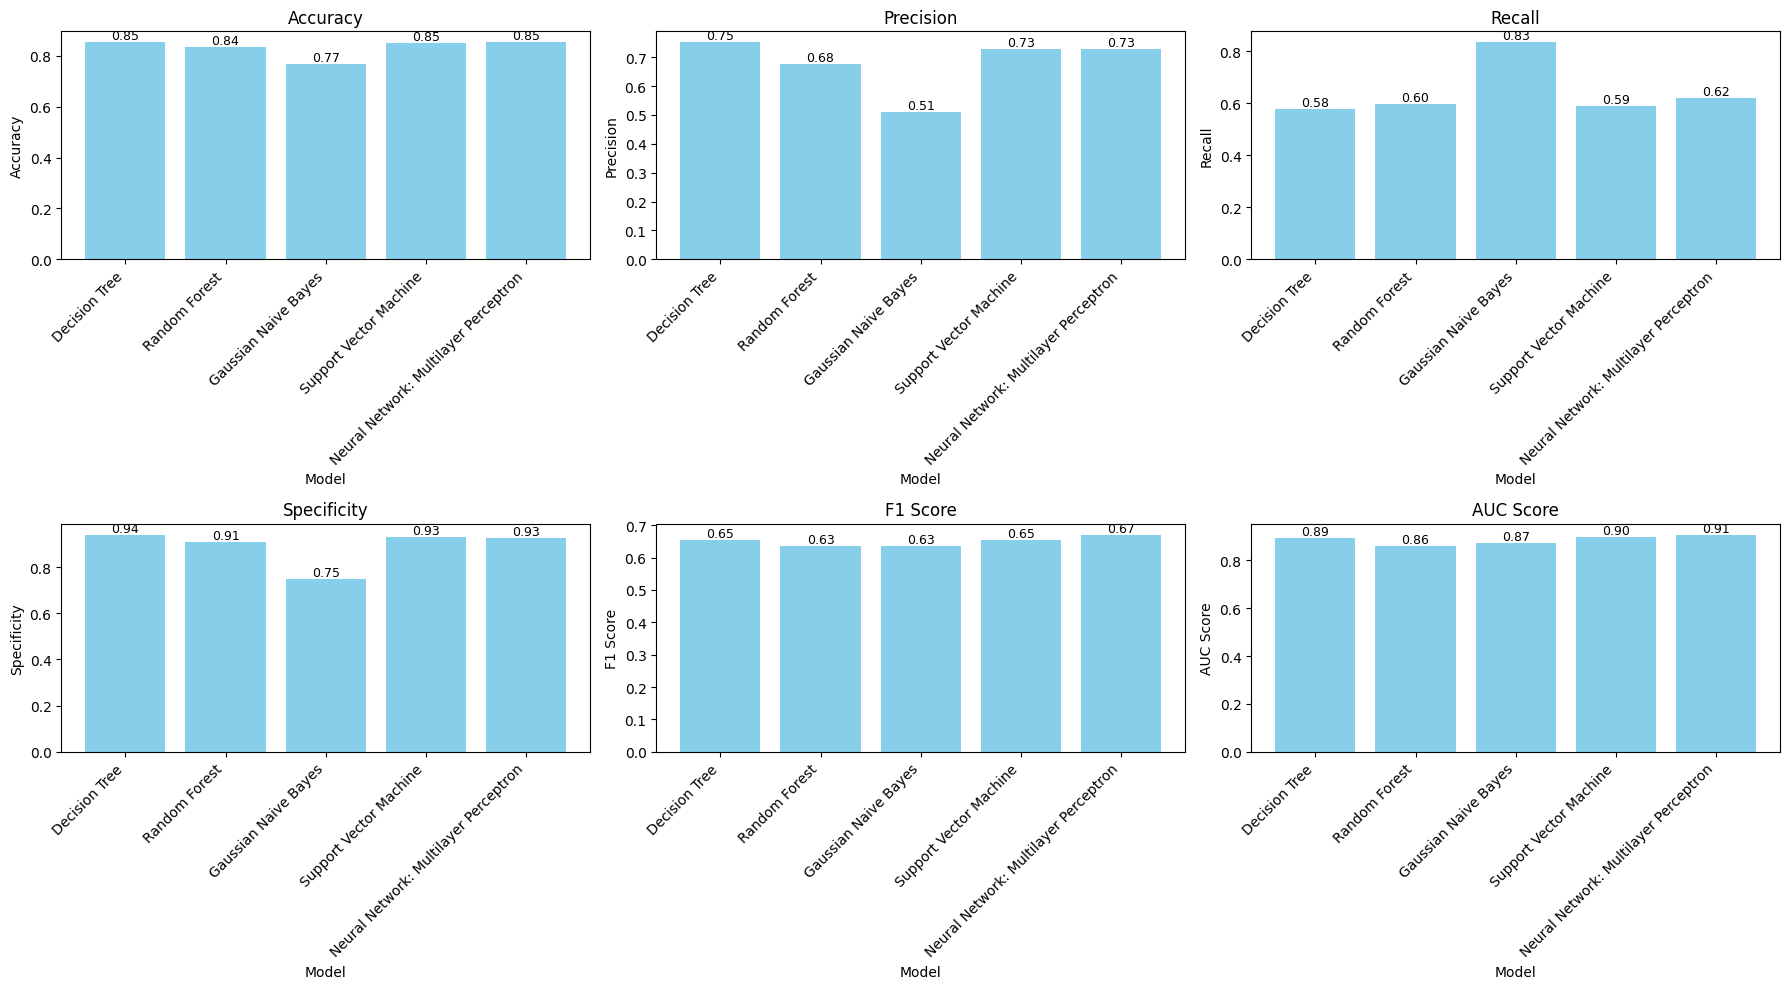

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics = [accuracy, precision, recall, specificity, f1_score, auc_score]
titles = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'AUC Score']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i // 3, i % 3]
    bars = ax.bar(model_names, metric, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel(title)
    ax.set_xticks(np.arange(len(model_names)))
    ax.set_xticklabels(model_names, rotation=45, ha="right")

    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()

#### Comment on results

- Based on domain knowledge of the dataset, we can clearly observe that the true, false positives (TP, FP) and true, false negatives (TN, FN) in the target column ```income``` have the same cost, means that they also have equal importance, so I will use metric **accuracy** and **AUC Score** to decide which is the best model. **Accuracy** measures the proportion of the correct predictions out of the total predictions, and **AUC Score** shows that the model performs well at distinguishing classes. 

- From the earlier evaluation and the above plot, we can clearly see that ```Decision Tree``` has highest **accuracy** and ```Neural Network: Multilayer Perceptron``` has highest **AUC Score**. But ```Decision Tree``` clearly has lower **AUC Score** than ```Neural Network: Multilayer Perceptron``` , while the accuracy of ```Decision Tree``` and ```Neural Network: Multilayer Perceptron``` are quite the same.

$\rightarrow$ Best-performing model is ```Neural Network: Multilayer Perceptron```

### 4.2. Analyze misclassifications

- Confusion matrices of each model

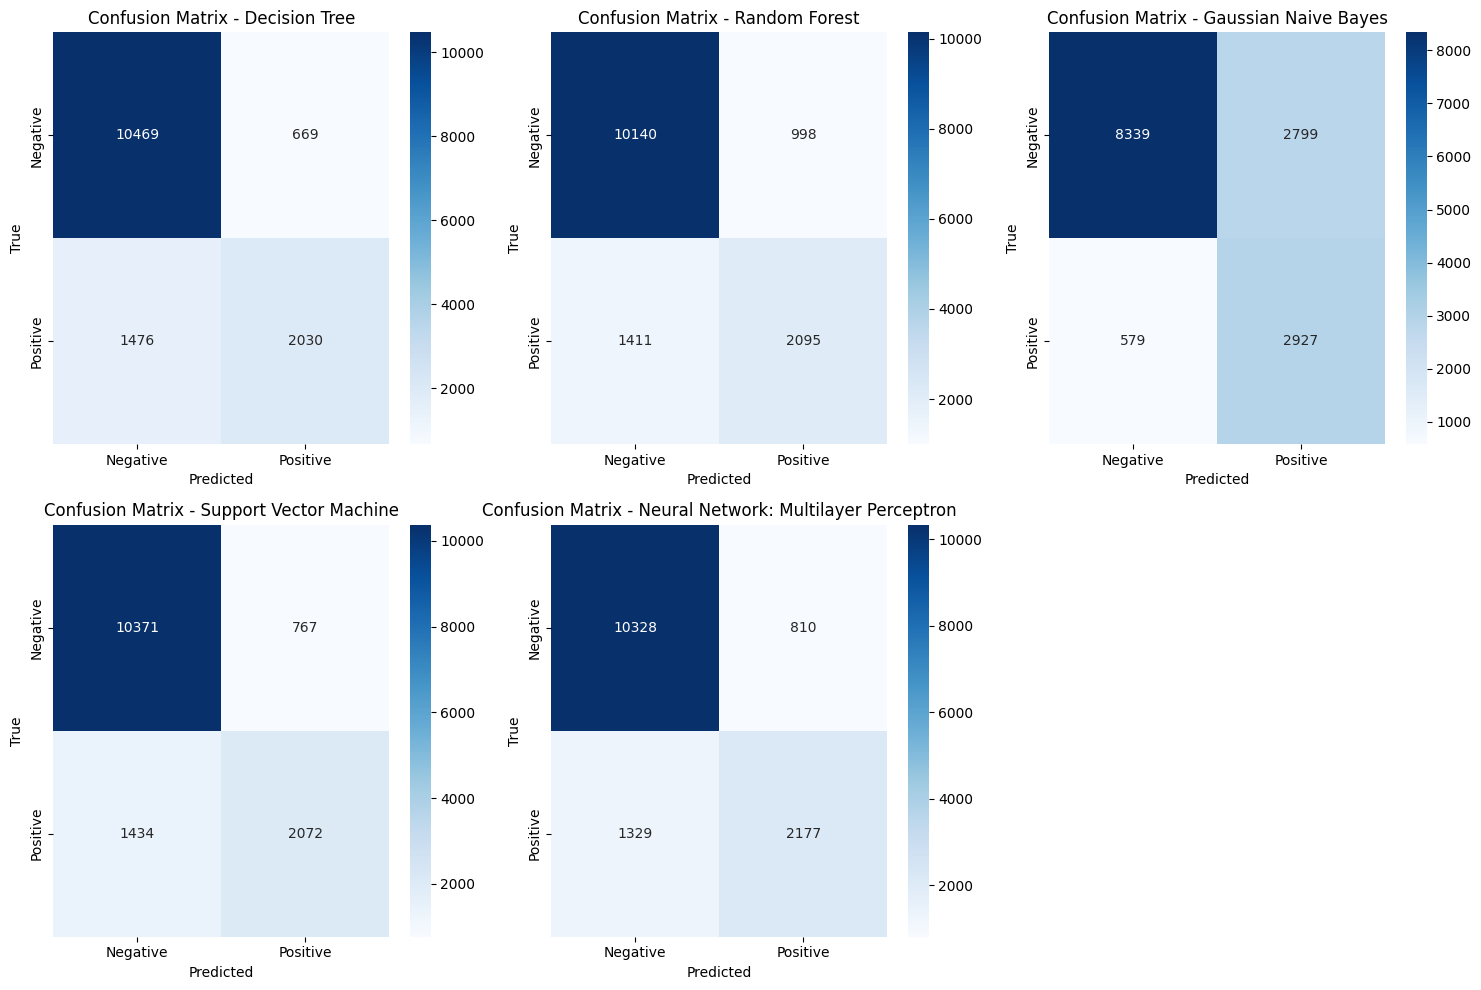

In [42]:
cms = [metric['cm'] for metric in model_metrics]
n_models = len(model_names)
n_cols = 3  
n_rows = int(np.ceil(n_models / n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()
for i, cm in enumerate(cms):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].set_title(f'Confusion Matrix - {model_names[i]}')

for j in range(n_models, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

#### Comments on results

- To analyze misclassifications, we mainly focus on False Positives and False Negatives (FP and FN)

- From the confusion matrices above, we can clearly see that ```Guassian Naive Bayes``` has the highest number of False Positives but lowest number of False Negatives, and ```Decision Tree``` has highest number of False Negatives but lowest number of False Positives. This means that ```Gaussian Naive Bayes``` is better at identifying positive cases, but it also tends to mistakenly label some negative cases as positive. On the other hand, ```Decision Tree``` is better at avoiding false positives, but it may miss more actual positive cases.

- For ```Guassian Naive Bayes```, in the Evaluation step, I have clarified that this dataset is imbalance. This makes the prediction tends to prior the class that has high majority and probability.

- For ```Decision Tree```, it often predicts based on majority voting within each leaf nodes, for example if negative class is dominant in a leaf, even if the positive case is in that leaf, the prediction may lean toward the negative one.

### 4.3. Compare runtime and scalability

I will use the ```runtime``` list that stores runtime of training each model from the classification part, and the ```accuracy``` from the evaluated metrics to compare.

#### 4.3.1. Measure by runtime

- Runtime of each model vs accuracy (which has been stored in ```run_time``` and ```accuracy```)

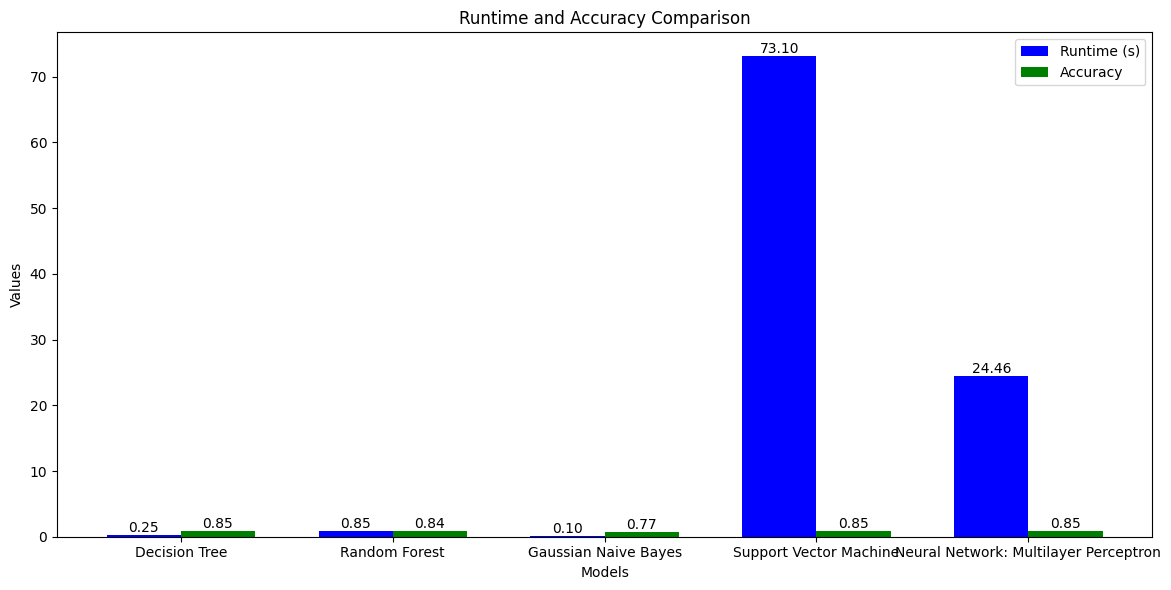

In [43]:
x = np.arange(len(model_names))
bar_width = 0.35

plt.figure(figsize=(12, 6))
runtime_bars = plt.bar(x - bar_width / 2, run_time, width=bar_width, label='Runtime (s)', color='blue')
accuracy_bars = plt.bar(x + bar_width / 2, accuracy, width=bar_width, label='Accuracy', color='green')
for bar in runtime_bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

for bar in accuracy_bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Runtime and Accuracy Comparison')
plt.xticks(x, model_names)
plt.legend()
plt.tight_layout()
plt.show()

#### Comments on results

- ```Support Vector Machine``` has the slowest **runtime**, and ```Guassian Naive Bayes``` has the fastest **runtime**. But **accuracy** of ```Guassian Naive Bayes``` is the lowest, while **accuracy** of ```Support Vector Machine``` belongs to one of the highest.

-  This trade-off highlights that the choice of model depends on the specific requirements. If the task needs a fast solution with reasonable **accuracy**, ```Gaussian Naive Bayes``` might be appropriate in some specific cases. However, if the priority is to achieve the highest possible **accuracy** and you can afford slower predictions, ```Support Vector Machine``` could be a better option.

- But if the task requires both **accuracy** and **runtime**, ```Decision Tree``` is suitable. It has fast **runtime** but high **accuracy**.

#### 4.3.2. Measure the runtime of training and predicting model with different size of train and test sets size (compare scalability)

I will test training the model with different train set ratio (train = 70% / 80% / 90%), measuring their runtimes and accuracies.

- Train the best models again with different ```train_set_ratio```

In [44]:
train_set_ratio = [0.7, 0.8, 0.9]
accuracy_for_scalability = {}
run_time_for_scalability = {}

for i in range(len(train_set_ratio)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - train_set_ratio[i]), random_state=42, shuffle=True, stratify=y)
    accuracies = []
    runtimes = []
    for j in range(len(best_models)):
        start_time = time.time()
        best_models[j].fit(X_train, y_train)
        y_pred = best_models[j].predict(X_test)
        end_time = time.time()
        runtimes.append(end_time - start_time)
        accuracies.append(accuracy_score(y_test, y_pred))
    run_time_for_scalability[train_set_ratio[i]] = runtimes
    accuracy_for_scalability[train_set_ratio[i]] = accuracies

- Plot the results

<Figure size 1200x600 with 0 Axes>

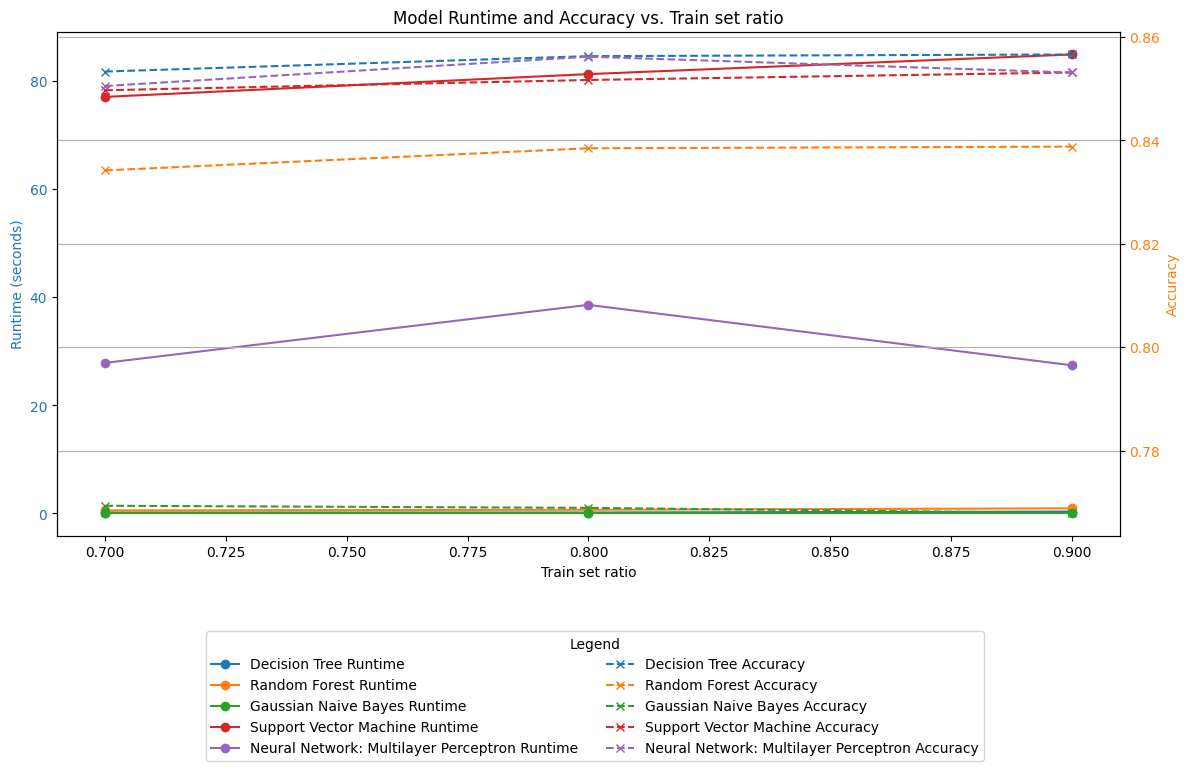

In [45]:
ratios = list(run_time_for_scalability.keys())
runtimes = list(run_time_for_scalability.values())
accuracy_values = list(accuracy_for_scalability.values())

num_models = len(runtimes[0])

plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(12, 6))

for i in range(num_models):
    ax1.plot(
        ratios,
        [runtime[i] for runtime in runtimes],
        marker='o',
        label=f'{model_names[i]} Runtime'
    )
ax1.set_xlabel('Train set ratio')
ax1.set_ylabel('Runtime (seconds)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
for i in range(num_models):
    ax2.plot(
        ratios,
        [accuracy[i] for accuracy in accuracy_values],
        marker='x',
        linestyle='--',
        label=f'{model_names[i]} Accuracy'
    )
ax2.set_ylabel('Accuracy', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(
    lines + lines2, 
    labels + labels2, 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.05),  
    ncol=2, 
    title='Legend'
)

plt.title('Model Runtime and Accuracy vs. Train set ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Comments on results

- Through overall observation, the **runtime** of each training process are higher with higher train set ratio. There is a specific case that the **runtime** of ```Neural Network: Multilayer Perceptron``` goes faster then slower when the train set ratio rises.

- This can be attributed to the trade-off between model complexity and data quantity. With a larger training set, the model has more information to learn from, which can initially improve its performance. However, as the training set continues to grow, the model may struggle to generalize effectively, leading to overfitting. Additionally, the increased runtime might not necessarily translate to better accuracy, suggesting that at some point, the added data does not contribute significantly to improving model performance. This trade-off highlights the need to balance data quantity, model complexity, and computational costs to achieve optimal performance.

### 4.4. Recommend the best model(s) based on evaluation metrics, computational cost, and dataset characteristics

- ```Evaluation metrics``` : In **section 4.1**, I have pointed out the best model with the acceptable classification metrics are ```Decision Tree``` and ```Neural Network: Multilayer Perceptron```.

- ```Computational cost``` : In **section 4.3**, I have clarified that the fastest classification algorithm when training is ```Guassian Naive Bayes``` and ```Decision Tree```, but I prior the ```Decision Tree``` since ```Guassian Naive Bayes``` has low evaluation metrics.

- ```Dataset characteristics``` : The dataset is imbalanced, it doesn't follow a normal distribution. Among classification algorithms, ```Neural Network: Multilayer Perceptron``` can handle those issues, and it also has highest **AUC Score**.

$\rightarrow$ **Best models recommended** :
1. ```Decision Tree``` (high evaluation metrics, low computational cost) 
2.  ```Neural Network: Multilayer Perceptron``` (suitable for dataset characteristics, high evaluation metrics, moderate computational cost).

## 5. References